In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [157]:
from tensorflow.keras.models import load_model
model = load_model('sample_data/facenet_keras.h5')

print(model.inputs)
print(model.outputs)


[<KerasTensor: shape=(None, 160, 160, 3) dtype=float32 (created by layer 'input_1')>]
[<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'Bottleneck_BatchNorm')>]


In [158]:
def triplet_loss_function(y_true, y_pred, alpha=0.2):
  anchor, positive, negative = y_pred[0], y_pred[1], y_pred[2]
  post_dist = tf.reduce_sum(tf.square(tf.subtract(anchor, positive)), axis = -1)
  neg_dist = tf.reduce_sum(tf.square(tf.subtract(anchor, negative)), axis = -1)
  basic_loss = tf.maximum(tf.add(tf.subtract(post_dist,neg_dist), alpha),0)
  loss = tf.reduce_sum(basic_loss)

  return loss


In [159]:
FRmodel = model

In [160]:
import PIL

In [161]:
def img_encoding(img_path, model):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(160, 160))
    img = np.around(np.array(img) / 255.0, decimals=12)
    x_train = np.expand_dims(img, axis=0)
    embedding = model.predict_on_batch(x_train)
    return embedding / np.linalg.norm(embedding, ord=2)

In [162]:
database = {}
database["saquib"] = img_encoding("sample_data/pictures/Saquib.jpeg", FRmodel)
database["Bale"] = img_encoding("sample_data/pictures/cb.jpg", FRmodel)
database["Brad"] = img_encoding("sample_data/pictures/br.jpg", FRmodel)
database["Daisy"] = img_encoding("sample_data/pictures/dej.jpg", FRmodel)
database["Leonardo"] = img_encoding("sample_data/pictures/ldc.jpg", FRmodel)
database["Paul"] = img_encoding("sample_data/pictures/pm.jfif", FRmodel)
database["Robert"] = img_encoding("sample_data/pictures/rp.jfif", FRmodel)

In [165]:
saquib = tf.keras.preprocessing.image.load_img("sample_data/pictures/Saquib.jpeg", target_size=(160,160))
np.around(np.array(saquib) / 255.0 , decimals=12).shape

(160, 160, 3)

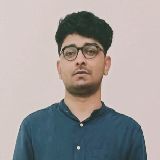

In [166]:
saquib

In [167]:
def verify(img_path, identity, database, model):

  encoding = img_encoding(img_path,model)
  dist = np.linalg.norm(encoding - database[identity])

  if(dist < 0.7):
    print("It is " + str(identity) + ", plz come in!")
    door_open = True
  else :
    print("It is not " + str(identity) + ", plz go away!")  
    door_open = False

  return dist, door_open  



In [170]:
verify("sample_data/pictures/ldc.jpg","Leonardo", database, FRmodel)

It is Leonardo, plz come in!


(0.0, True)

In [171]:
verify("sample_data/pictures/ldc3.jpg", "saquib", database, FRmodel)

It is not saquib, plz go away!


(0.97351754, False)

In [172]:
def who_is_it(img_path,database,model):
  min_dist = 100
  encoding = img_encoding(img_path,FRmodel)
  for (name, db_enc) in database.items():
    dist = np.linalg.norm(encoding - db_enc)
    if dist < min_dist:
      min_dist = dist
      identity = name

  if (min_dist > 0.7):
     print("Person is not in the database")   
  else:
    print("Hey " + str(identity) + ", plz come in!")

  return identity, min_dist  



In [173]:
img_path1 = "sample_data/pictures/ldc.jpg"
img_path2 = "sample_data/pictures/ldc3.jpg"


encoding2 = img_encoding(img_path1,FRmodel)
encoding1 = img_encoding(img_path2,FRmodel)
dist = np.linalg.norm(encoding2 - encoding1)
print(dist)

1.2159379


In [176]:
who_is_it("sample_data/pictures/ldc.jpg", database, FRmodel)

Hey Leonardo, plz come in!


('Leonardo', 0.0)

In [177]:
who_is_it("sample_data/pictures/rp.jfif", database, FRmodel)

Hey Robert, plz come in!


('Robert', 0.0)